## Task 소개 : OCR

Optical Character Recognition(OCR)은 기술이 발전하며 전통적인 문서를 디지털 형태로 변환하는 데 사용되는 중요한 기술로 자리 잡았습니다. OCR은 사람이 쓰거나 기계로 인쇄한 문자들을 스캔하고, 이를 텍스트 데이터로 변환합니다. 이를 통해 수많은 문서들이 검색 가능하고 편집 가능한 형태로 재사용될 수 있게 됩니다.

이 기술은 글자와 단어를 정확하게 인식하여 디지털 데이터로 변환하는데 중점을 둡니다. 한글, 영어, 숫자 등 다양한 문자를 인식할 수 있으며, 다양한 언어와 폰트에서도 확장하여 적용이 가능합니다.

<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*8i5nZ5lr5CgvVrH8rCSn7w.png">

## 라이브러리 import

In [2]:
# 데이터 처리 및 분석을 위한 라이브러리
import pandas as pd  # 데이터 처리 및 분석을 위한 라이브러리
from sklearn.model_selection import train_test_split  # 데이터 세트를 훈련 및 테스트 세트로 분할하는 데 사용

# 파일 및 경로 처리를 위한 라이브러리
import os  # 운영 체제와 상호작용, 파일 및 디렉토리 경로 처리에 사용
import glob  # 파일 시스템 내의 파일 경로명을 찾는 데 사용

# 이미지 처리를 위한 라이브러리
from PIL import Image  # 이미지 파일을 열고 조작하는 데 사용

# 데이터 시각화를 위한 라이브러리
import matplotlib.pyplot as plt  # 데이터 시각화를 위한 플로팅 라이브러리

# 기타 유틸리티
import random  # 난수 생성 및 무작위 선택을 위한 유틸리티 함수 제공
from typing import *  # 타입 힌트 및 제네릭 타입을 위한 라이브러리

## Google Colab에서 데이터 관리 및 최적 활용 전략

### 드라이브 설정  
- 코랩에서 데이터에 접근하는 방법에는 크게 두 가지가 있습니다.
  - 1. 구글 드라이브 연동 : 자신의 Google Drive를 코랩에 연결하여 드라이브 안의 데이터에 접근합니다.   
  - 2. 코랩의 세션 드라이브 업로드 : 코랩의 임시 저장 공간에 데이터를 업로드하여 사용합니다.

- 각각의 방법은 장단점을 가지고 있습니다.
- 구글 드라이브 연동의 장점은 드라이브에 데이터가 미리 준비되어 있으면 즉시 사용할 수 있다는 것이며, 데이터가 지속적으로 보존됩니다. 단점은 이미지 데이터와 같이 용량이 큰 데이터를 다룰 때, 로딩 속도가 매우 느리다는 단점이 있습니다.  
- 코랩의 세션 드라이브에 업로드하는 방법의 장점은 드라이브 연동에 비해 로딩 속도를 매우 빠르게 사용할 수 있다는 것입니다. 하지만 이 방법의 단점은 코랩 런타임이 초기화될 때마다 데이터가 사라지고, 다른 ipynb에서 접근이 안된다는 단점이 존재합니다.

- 따라서 이미지 데이터와 같이 대용량의 학습 데이터는 학습 직전에 임시 경로에 업로드하여 사용하고, 그 외 필요한 파일들은 구글 드라이브에서 직접 불러오는 것이 좋습니다. 이렇게 하면 데이터 사용의 효율성과 접근성을 극대화할 수 있습니다.

## 코랩의 세션 드라이브에 데이터 업로드

In [1]:
import gdown

# Google Drive 파일 ID와 URL 설정
file_id = "1U7vCDZ4X9ElceQvBllL8ccGHXHjc1qTw"
url = f"https://drive.google.com/uc?id={file_id}"

# 다운로드할 파일 이름 설정
output = "OCR_ResNet18_dataset.zip"

# gdown을 사용하여 파일 다운로드
gdown.download(url, output, quiet=False)

print(f"파일 다운로드가 완료되었습니다: {output}")

Downloading...
From (original): https://drive.google.com/uc?id=1U7vCDZ4X9ElceQvBllL8ccGHXHjc1qTw
From (redirected): https://drive.google.com/uc?id=1U7vCDZ4X9ElceQvBllL8ccGHXHjc1qTw&confirm=t&uuid=2e7bc296-418a-47e6-bb69-f5cb9d5d22f5
To: /content/OCR_ResNet18_dataset.zip
100%|██████████| 82.9M/82.9M [00:03<00:00, 22.2MB/s]

파일 다운로드가 완료되었습니다: OCR_ResNet18_dataset.zip


In [3]:
# unzip 명령어를 통해 압축 파일을 해제해 줍니다.
!unzip -qq OCR_ResNet18_dataset.zip

In [4]:
# 코랩 환경에서 오른쪽 폴더 모양의 아이콘을 누르면 세션 드라이브 및 연동된 구글 드라이브를 확인할 수 있습니다.
root_path = os.getcwd() # 현재 경로를 root_path로 설정합니다.
print(root_path)

/content


In [7]:
# 코랩 드라이브에서 대량의 파일을 로드할 경우 매우 시간이 오래 걸립니다.
# 따라서 추후 사용할 이미지는 drive가 아닌 코랩 세션 드라이브의 경로로 설정해주고, 추후 해당 경로에 데이터를 업로드해줍니다.
image_path = os.path.join(root_path,"dataset","digit_data")
asset_path = "./assets"

In [8]:
# 학습 데이터셋
origin_train_df = pd.read_csv(os.path.join(image_path, "train_data.txt"), names=["path"])
origin_train_df["label"] = origin_train_df["path"].str[0].astype(int)
origin_train_df["path"] = origin_train_df["path"].apply(lambda x: os.path.join(image_path,x))
origin_train_df

,path,label
0,/content/dataset/digit_data/0/00001_3.jpg,0
1,/content/dataset/digit_data/0/00001_7.jpg,0
2,/content/dataset/digit_data/0/00002_3.jpg,0
3,/content/dataset/digit_data/0/00003_3.jpg,0
4,/content/dataset/digit_data/0/00003_7.jpg,0
...,...,...
21784,/content/dataset/digit_data/9/03817_2.jpg,9
21785,/content/dataset/digit_data/9/03817_5.jpg,9
21786,/content/dataset/digit_data/9/03857_1.jpg,9
21787,/content/dataset/digit_data/9/03857_5.jpg,9


In [9]:
# 테스트 데이터셋 (valid_data.txt지만 미리 나눠진 test set으로 사용하도록 하겠음)
test_df = pd.read_csv(f"{image_path}/valid_data.txt", names=["path"])
test_df["label"] = test_df["path"].str[0].astype(int)
test_df["path"] = image_path + "/" + test_df["path"]
test_df

,path,label
0,/content/dataset/digit_data/0/00004_1.jpg,0
1,/content/dataset/digit_data/0/00006_3.jpg,0
2,/content/dataset/digit_data/0/00007_3.jpg,0
3,/content/dataset/digit_data/0/00009_1.jpg,0
4,/content/dataset/digit_data/0/00011_7.jpg,0
...,...,...
5443,/content/dataset/digit_data/9/03786_1.jpg,9
5444,/content/dataset/digit_data/9/03814_1.jpg,9
5445,/content/dataset/digit_data/9/03817_1.jpg,9
5446,/content/dataset/digit_data/9/03817_6.jpg,9


## Train/Valid/Test 데이터셋 분리

kamp데이터는 train/valid 밖에 구분되어 있지 않지만

저희는 보다 명확한 검토를 위해

    train => train/valid

    valid = > test
    
로 사용하도록 하겠습니다

In [10]:
# train 데이터셋을 8:2로 나눠서 valid를 하도록 하겠습니다
train_df, valid_df = train_test_split(
    origin_train_df,
    test_size=0.2,
    random_state=0,
    shuffle=True,
    stratify=origin_train_df["label"],
)

## EDA

- 제조현장용 OCR(Optical Character Recognition) 학습 AI 데이터셋

- 데이터의 품질은 모델 성능을 결정하는 핵심 요소입니다. 모델의 최적 성능을 위해서는 고품질의 데이터가 필수적입니다.
- 하지만, 대다수의 데이터셋은 예상치 못한 오류나 결점을 포함할 수 있습니다. 그러므로, 단순히 데이터에 의존하기보다는 철저한 검증과정이 필요합니다.탐색적 데이터 분석(EDA)는 이 검증 과정의 핵심입니다. EDA는 데이터의 본질과 구조를 깊게 파악하는 데 중점을 둡니다. 주요 목적은 아래와 같습니다.

    - 데이터 구조 파악
    - 이상치의 탐지
    - 데이터 전처리 방향성 설정
    - 데이터의 시각화

이를 통해 데이터의 품질 향상을 지향합니다.


- 데이터셋 형태 : image파일과 그에 연계된 txt 및 folder name기반 tagging

- 데이터 수집 방법 : 클라우드 기반의 RPMS를 통해, 생산현장에서 업로드된 이미지를 확보. 실제 기업 현장에서 발생하는 계측 이미지를 직접 촬영하여 수집

- 데이터셋 파일 확장자 : 이미지 (jpg), 레이블 (folder name)

- 데이터 개수 :  27,237개(76.1MB)

---

-  이미지 당 하나의 숫자만 있는 것을 알 수 있습니다

-  7 Segment 이미지는 전반적으로 붉은 빛을 띄고 있습니다 데이터를 normalize할 때 이를 고려하면 더 좋은 성능이 나올 수 있습니다

-  약간 회전되거나 치우쳐져 있어도 맞출 수 있게 rotate, traslate 증강을 적용

-  이미지의 밝기 및 채도가 변화하여도 맞출 수 있게 brightnss, contrast 증강을 적용

In [11]:
image_path

'/content/dataset/digit_data'

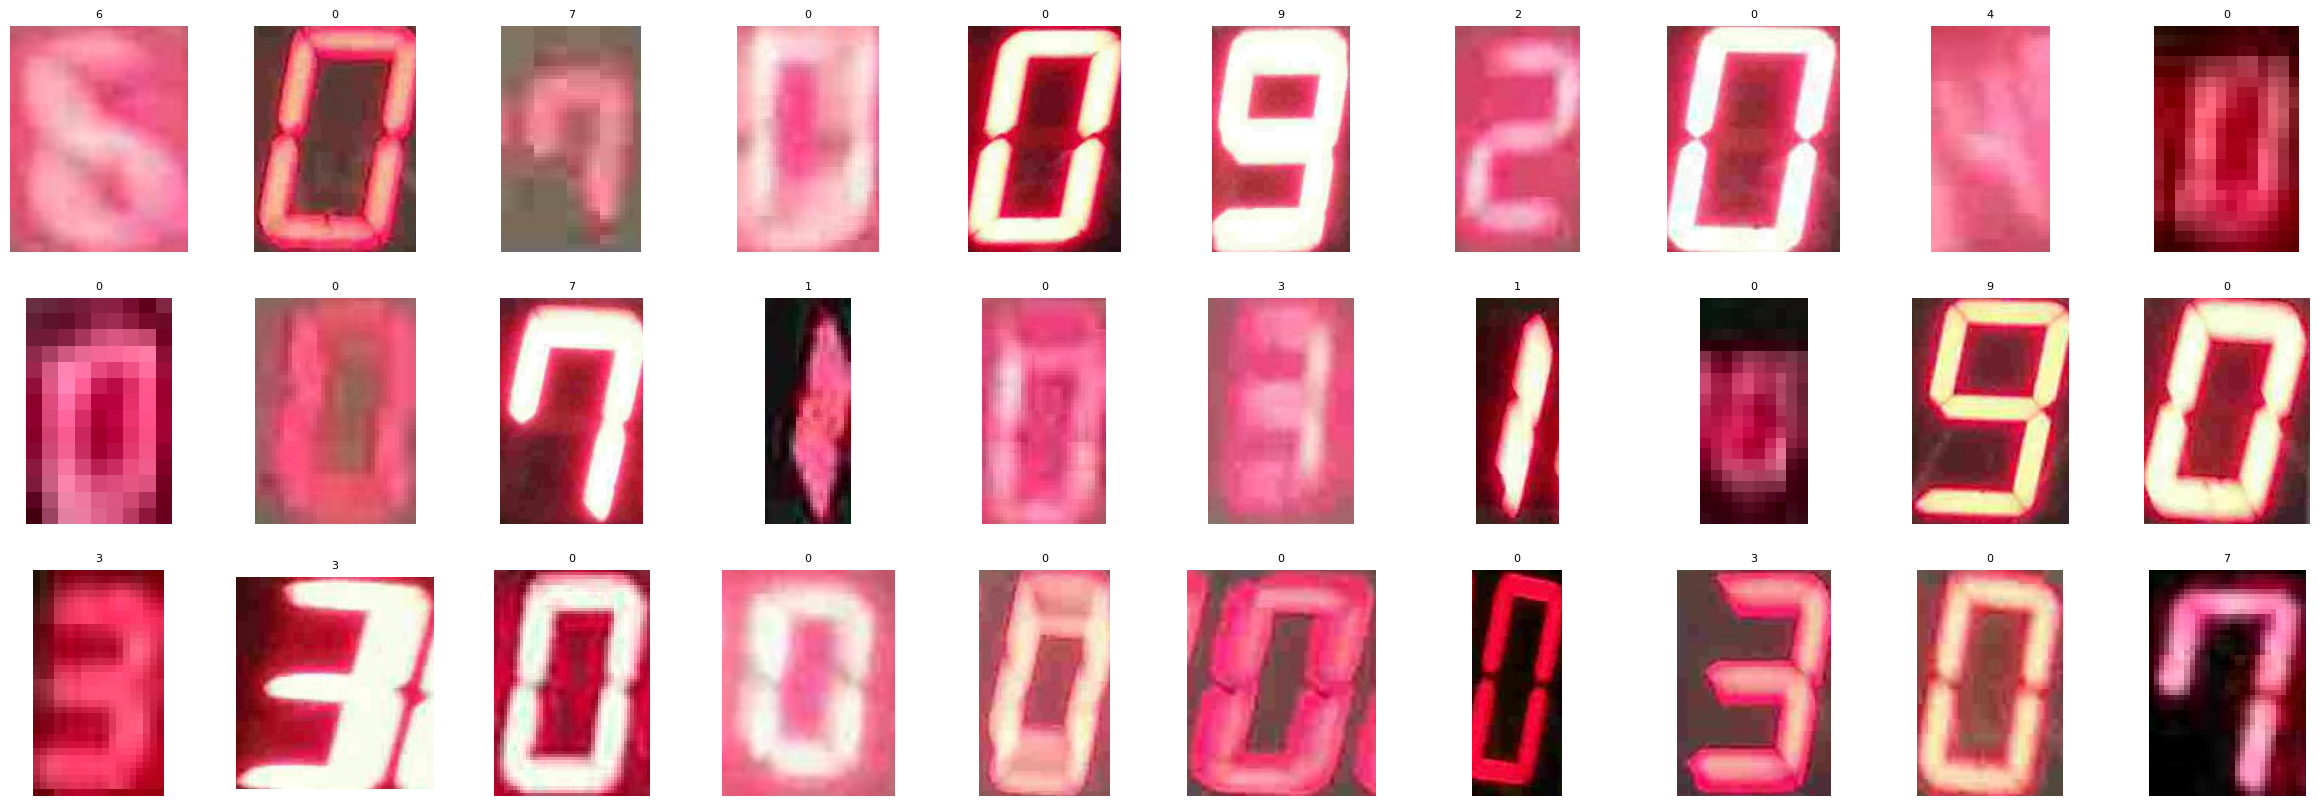

In [12]:
# 전체 이미지 리스트 중 임의로 30개 추출하여 시각화합니다.
all_image_list = glob.glob(f'{image_path}/*/*')
image_files = random.sample(all_image_list,30)

# 이미지를 로드하고 저장
images = [Image.open(img) for img in image_files]
labels = list(map(lambda x: x.split('/')[-2], image_files))

# 플롯 설정
fig, axes = plt.subplots(3, 10, figsize=(30, 10))  # 5x4 격자
axes = axes.flatten()

# 각 격자에 이미지 표시
for label,img, ax in zip(labels,images, axes):
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(label, fontsize=8)

plt.show()

- 2와 5는 좌우 반전 시 동일한 형태라는 것을 알 수 있습니다
    
- 데이터 학습 및 추론 시 좌우 반전을 하게되면 안됩니다

---

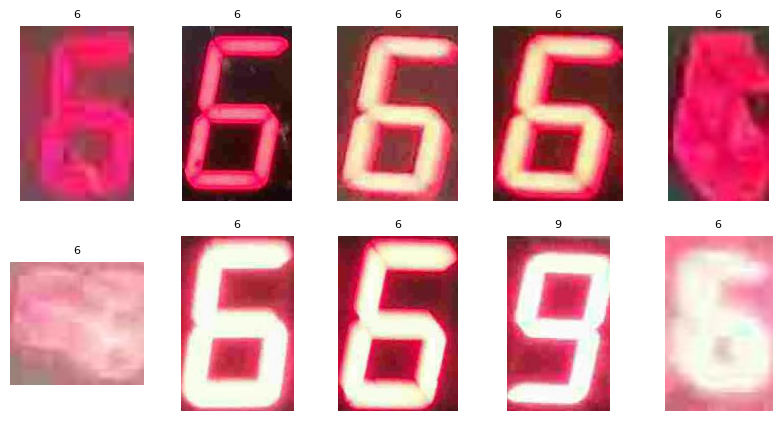

In [13]:
# 전체 이미지 리스트 중 숫자 6과 9를 임의로 20개 추출하여 시각화합니다.
image_6_or_9_list = glob.glob(f'{image_path}/6/*') + glob.glob(f'{image_path}/9/*')
image_files = random.sample(image_6_or_9_list,20)

# 이미지를 로드하고 저장
images = [Image.open(img) for img in image_files]
labels = list(map(lambda x: x.split('/')[-2], image_files))

# 플롯 설정
fig, axes = plt.subplots(2, 5, figsize=(10, 5))  # 2*5 격자
axes = axes.flatten()

# 각 격자에 이미지 표시
for label,img, ax in zip(labels,images, axes):
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(label, fontsize=8)

plt.show()

6과 9는 좌우반전 + 상하반전을 같이해야 같은 모양됩니다 (또는 180도 회전)

그러나 숫자가 거꾸로 출력될 일은 현재 문제에는 없을 것으로 예상되어, 좌우상하 반전은 증강에서 제외하도록 합니다

---

### 메타 데이터 분석

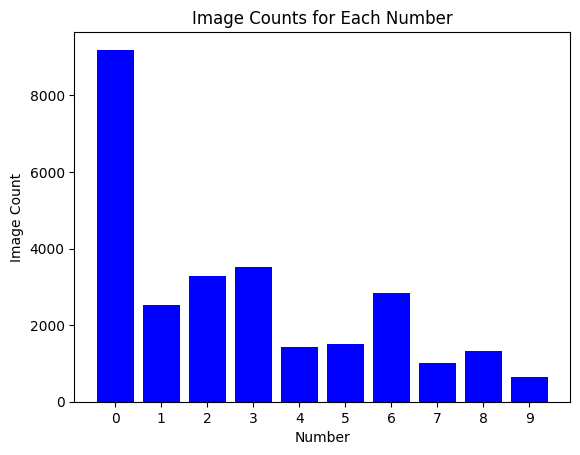

In [14]:
# 숫자 폴더 이름 리스트 생성
number_folders = [str(i) for i in range(10)]

# 각 숫자 폴더에서 이미지 개수 카운트
image_counts = []
for folder in number_folders:
    folder_path = os.path.join(image_path, folder)
    count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    image_counts.append(count)

# 막대 그래프 생성
plt.bar(number_folders, image_counts, color='blue')
plt.xlabel('Number')
plt.ylabel('Image Count')
plt.title('Image Counts for Each Number')
plt.show()

- 데이터 클래스가 불균형함을 알 수 있습니다

- 모델을 학습 시 이를 고려하여 학습하여야 합니다

- 그렇지 않으면 특정 클래스에 편향된 모델이 개발될 수 있습니다

- 데이터 불균형을 해소하는 방법은 여러가지가 있습니다

---
언더 샘플링
1. Random Sampling
2. Tomek Links
3. CNN Rule
4. One Sided Selection

언더 샘플링의 장단점

장점
- 다수 범주 데이터의 제거로 계산시간이 감소합니다.

단점
- 데이터 제거로 인한 정보 손실이 발생할 수 있습니다.

---
오버 샘플링
1. Resampling
2. SMOTE
3. Borderline SMOTE
4. ADASYN
5. GAN

오버 샘플링의 장단점

장점
- 데이터를 증가시키기 때문에 정보 손실이 없습니다.
- 대부분의 경우 언더 샘플링에 비해 높은 분류 정확도를 보입니다.


단점
- 데이터 증가로 인해 계산 시간이 증가할 수 있으며 과적합 가능성이 존재합니다.
- 노이즈 또는 이상치에 민감합니다.

---
손실 함수
1. Focal Loss
2. Weighted Cross Entropy

---


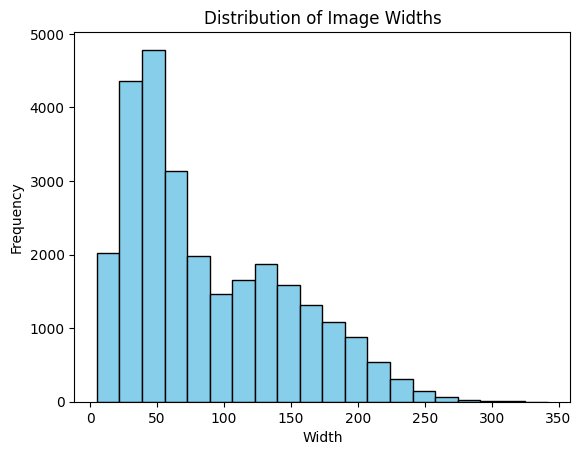

In [15]:
# 모든 이미지의 가로 길이를 저장할 리스트
widths = []

# 각 숫자 폴더를 순회하며 이미지의 가로 길이 수집
for folder in number_folders:
    folder_path = os.path.join(image_path, folder)
    # 해당 폴더의 모든 파일에 대해 반복
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        # 파일이 이미지인 경우만 처리
        if os.path.isfile(file_path) and file.lower().endswith(('.png', '.jpg', '.jpeg')):
            with Image.open(file_path) as img:
                width, height = img.size
                widths.append(width)  # 가로 길이 저장

# 이미지 가로 길이의 분포 시각화
plt.hist(widths, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Width')
plt.ylabel('Frequency')
plt.title('Distribution of Image Widths')
plt.show()

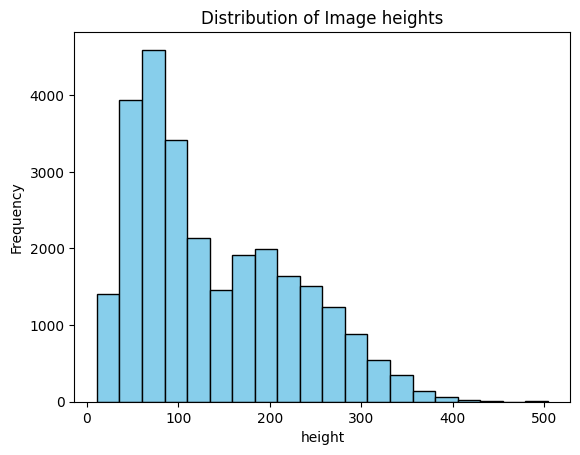

In [16]:
# 모든 이미지의 세로 길이를 저장할 리스트
heights = []

# 각 숫자 폴더를 순회하며 이미지의 세로 길이 수집
for folder in number_folders:
    folder_path = os.path.join(image_path, folder)
    # 해당 폴더의 모든 파일에 대해 반복
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        # 파일이 이미지인 경우만 처리
        if os.path.isfile(file_path) and file.lower().endswith(('.png', '.jpg', '.jpeg')):
            with Image.open(file_path) as img:
                width, height = img.size
                heights.append(height)  # 세로 길이 저장

# 이미지 세로 길이의 분포 시각화
plt.hist(heights, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('height')
plt.ylabel('Frequency')
plt.title('Distribution of Image heights')
plt.show()

이미지의 사이즈는 매우 작은 사이즈 ~ 중간 사이즈의 분포임을 알 수 있습니다

모델의 input으로 넣을 이미지 사이즈는 보통의 사이즈로 해도 문제 없을 것으로 보입니다 (224x224)

---